In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
ablation_results_path = "/home/abpal/WorkFiles/ablation_result50.json"

In [5]:
def summarize_ablation(path):
    with open(path) as json_file:
        data = json.load(json_file)
    
    changed,unchanged = 0,0
    count = len(data.keys())
    for key in data.keys():
        total_docs = 11314
        for words in data[key].keys():
            changed += int(data[key][words].split()[0]) / total_docs
            unchanged += int(data[key][words].split()[4]) / total_docs
    
    print(f"Changed : {changed*10/count} , Unchanged  : {unchanged*10/count}")

In [6]:
summarize_ablation(ablation_results_path)

Changed : 15.26697896411526 , Unchanged  : 84.7330210358847


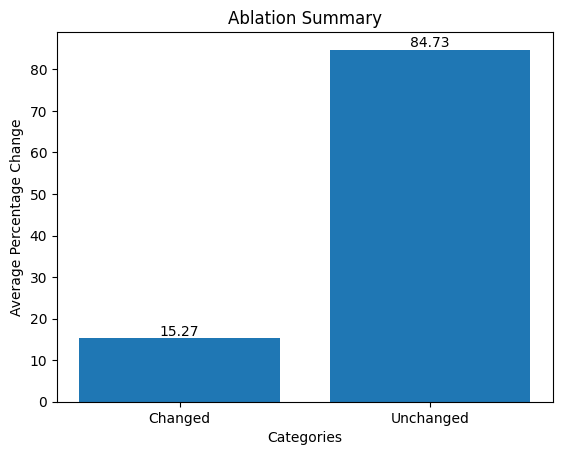

In [14]:
# Create a bar chart
categories = ['Changed', 'Unchanged']
values = [15.26697896411526, 84.7330210358847]

plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Average Percentage Change')
plt.title('Ablation Summary')

# Add numbers on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    
plt.show()

# Centroid Distances 

In [20]:
centroid_results_path = "/home/abpal/WorkFiles/centroid_result50.json"

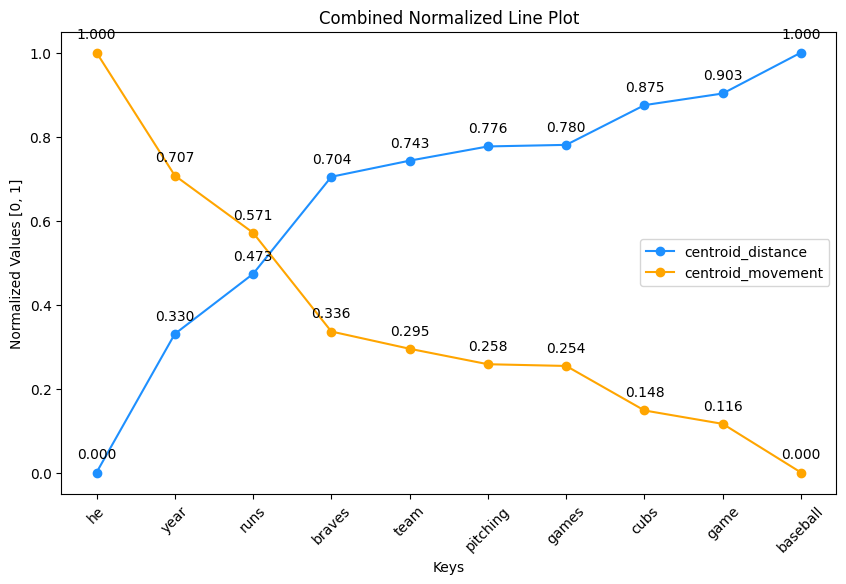

In [18]:
import matplotlib.pyplot as plt

def normalize_dict_values(data_dict):
    # Find the minimum and maximum values
    min_value = min(data_dict.values())
    max_value = max(data_dict.values())
    
    # Normalize the values to the range [0, 1]
    normalized_data = {key: (value - min_value) / (max_value - min_value) for key, value in data_dict.items()}
    
    return normalized_data

def plot_normalized_dict_values_combined(data_dict1, data_dict2, title):
    # Normalize both dictionaries
    normalized_data1 = normalize_dict_values(data_dict1)
    normalized_data2 = normalize_dict_values(data_dict2)

    # Sort the normalized dictionary items by values
    sorted_items1 = sorted(normalized_data1.items(), key=lambda x: x[1])
    keys1, values1 = zip(*sorted_items1)

    sorted_items2 = sorted(normalized_data2.items(), key=lambda x: x[1])
    keys2, values2 = zip(*sorted_items2)

    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(keys1, values1, marker='o', color='dodgerblue', linestyle='-', label='centroid_distance')
    plt.plot(keys2, values2, marker='o', color='orange', linestyle='-', label='centroid_movement')
    plt.xlabel('Keys')
    plt.ylabel('Normalized Values [0, 1]')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()

    # Annotate the data points with values for both lines
    for i, v in enumerate(values1):
        plt.annotate(f'{v:.3f}', (keys1[i], v), textcoords="offset points", xytext=(0, 10), ha='center')
    for i, v in enumerate(values2):
        plt.annotate(f'{v:.3f}', (keys2[i], v), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.show()

data = {
    "centroid_distance": {
        "he": 0.48084741830825806, "year": 0.5818169713020325, "baseball": 0.7868375778198242,
        "team": 0.7080724835395813, "game": 0.7570102214813232, "runs": 0.6255769729614258,
        "braves": 0.6963326930999756, "pitching": 0.718431830406189, "games": 0.7195771336555481,
        "cubs": 0.7485277652740479
    },
    "centroid_movement": {
        "he": 0.09996110945940018, "year": 0.0910559743642807, "baseball": 0.069550059735775,
        "team": 0.07851219922304153, "game": 0.07307334244251251, "runs": 0.0869135633111,
        "braves": 0.0797618106007576, "pitching": 0.07739279419183731, "games": 0.07726801931858063,
        "cubs": 0.07404470443725586
    }
}

plot_normalized_dict_values_combined(data["centroid_distance"], data["centroid_movement"], 'Combined Normalized Line Plot')


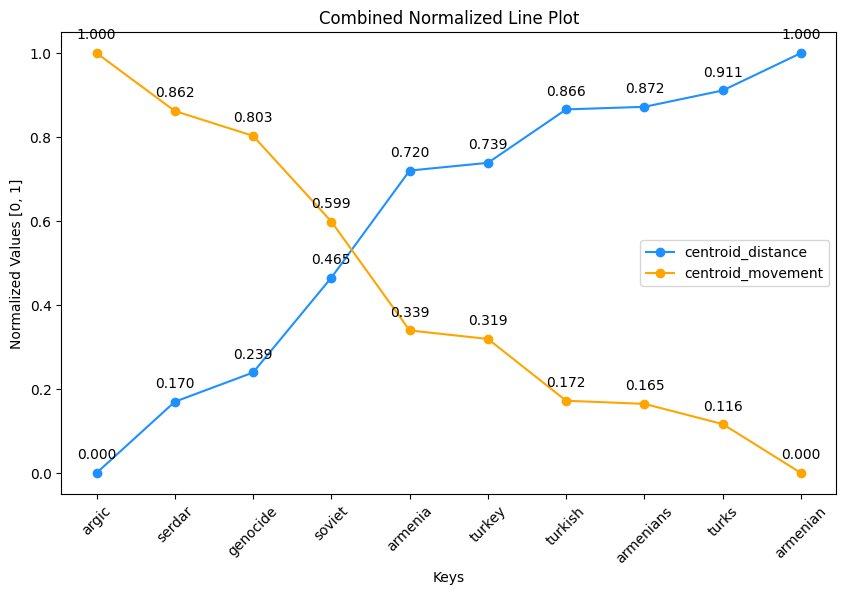

In [27]:
def plot_centroid_results(path,topic):
    with open(path) as json_file:
        data = json.load(json_file)
    plot_normalized_dict_values_combined(data[f"Topic_{topic}"]["centroid_distance"], data[f"Topic_{topic}"]["centroid_movement"], 'Combined Normalized Line Plot')
    
plot_centroid_results(centroid_results_path,10)

# Sufficiency

In [9]:
ablation_mappings50 = {0: '7698 elements changed and 3616 elements remained the same.',
 1: '8056 elements changed and 3258 elements remained the same.',
 2: '7986 elements changed and 3328 elements remained the same.',
 3: '7879 elements changed and 3435 elements remained the same.',
 4: '7823 elements changed and 3491 elements remained the same.',
 5: '7813 elements changed and 3501 elements remained the same.',
 6: '7731 elements changed and 3583 elements remained the same.',
 7: '7692 elements changed and 3622 elements remained the same.',
 8: '7633 elements changed and 3681 elements remained the same.',
 9: '7589 elements changed and 3725 elements remained the same.',
 10: '7574 elements changed and 3740 elements remained the same.',
 11: '7525 elements changed and 3789 elements remained the same.',
 12: '7494 elements changed and 3820 elements remained the same.',
 13: '7523 elements changed and 3791 elements remained the same.',
 14: '7515 elements changed and 3799 elements remained the same.',
 15: '7510 elements changed and 3804 elements remained the same.',
 16: '7423 elements changed and 3891 elements remained the same.',
 17: '7411 elements changed and 3903 elements remained the same.',
 18: '7399 elements changed and 3915 elements remained the same.',
 19: '7341 elements changed and 3973 elements remained the same.',
 20: '7329 elements changed and 3985 elements remained the same.',
 21: '7381 elements changed and 3933 elements remained the same.',
 22: '7357 elements changed and 3957 elements remained the same.',
 23: '7323 elements changed and 3991 elements remained the same.',
 24: '7317 elements changed and 3997 elements remained the same.',
 25: '7245 elements changed and 4069 elements remained the same.',
 26: '7158 elements changed and 4156 elements remained the same.',
 27: '7159 elements changed and 4155 elements remained the same.',
 28: '7155 elements changed and 4159 elements remained the same.',
 29: '7145 elements changed and 4169 elements remained the same.',
 30: '7198 elements changed and 4116 elements remained the same.',
 31: '7174 elements changed and 4140 elements remained the same.',
 32: '7114 elements changed and 4200 elements remained the same.',
 33: '7064 elements changed and 4250 elements remained the same.',
 34: '7064 elements changed and 4250 elements remained the same.',
 35: '7064 elements changed and 4250 elements remained the same.',
 36: '7030 elements changed and 4284 elements remained the same.',
 37: '6972 elements changed and 4342 elements remained the same.',
 38: '6977 elements changed and 4337 elements remained the same.',
 39: '7002 elements changed and 4312 elements remained the same.',
 40: '6985 elements changed and 4329 elements remained the same.',
 41: '6919 elements changed and 4395 elements remained the same.',
 42: '6912 elements changed and 4402 elements remained the same.',
 43: '6906 elements changed and 4408 elements remained the same.',
 44: '6878 elements changed and 4436 elements remained the same.',
 45: '6821 elements changed and 4493 elements remained the same.',
 46: '6850 elements changed and 4464 elements remained the same.',
 47: '6805 elements changed and 4509 elements remained the same.',
 48: '6786 elements changed and 4528 elements remained the same.',
 49: '6753 elements changed and 4561 elements remained the same.',
 50: '6843 elements changed and 4471 elements remained the same.'}

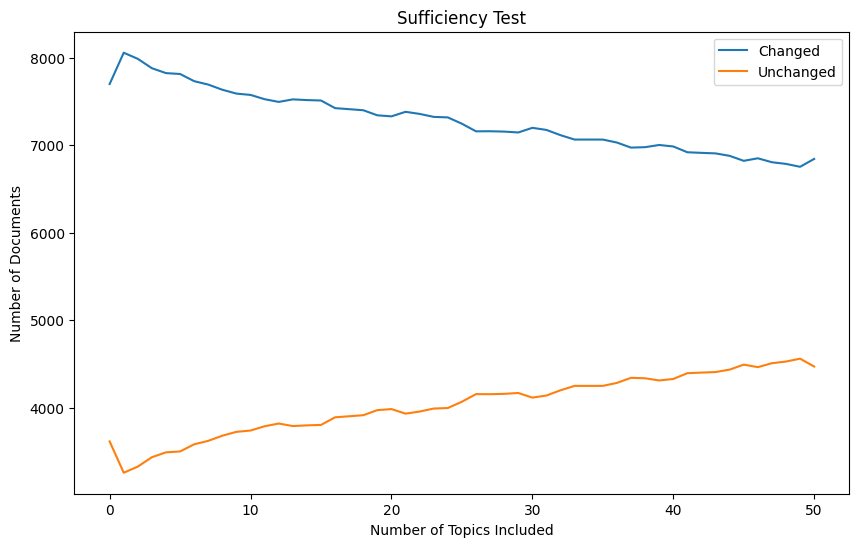

In [11]:
import matplotlib.pyplot as plt

changed_values = []
unchanged_values = []

for key, value in ablation_mappings50.items():
    parts = value.split(' ')
    changed_values.append(int(parts[0]))
    unchanged_values.append(int(parts[4]))

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(list(ablation_mappings50.keys()), changed_values, label='Changed')
plt.plot(list(ablation_mappings50.keys()), unchanged_values, label='Unchanged')

# Adding labels and legend
plt.xlabel('Number of Topics Included')
plt.ylabel('Number of Documents')
plt.title("Sufficiency Test")
plt.legend()

# Show the plot
plt.show()
